In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive/


In [ ]:
!pip install face_recognition
import face_recognition as fr
import cv2
import numpy as np
import os,shutil
from google.colab.patches import cv2_imshow

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=6716b7f780e3e8d43406c0cbc62ff03ce4f0ea0dc24ec8250ca4001ce0997439
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
#pip install face_recognition

In [ ]:
def get_encoded_faces():
  encoded={}
  for dirpath,dname,fname in os.walk("/content/drive/My Drive/face"):
    for f in fname:
      if f.endswith(".jpeg") or f.endswith(".jpg"):
        face=fr.load_image_file("/content/drive/My Drive/face/"+ f)
        encoding=fr.face_encodings(face)[0]
        encoded[f.split(".")[0]]=encoding
  return (encoded)        



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x=get_encoded_faces()

In [ ]:
x

{'ashu': array([-0.18934035,  0.09331407,  0.10532318,  0.0015474 , -0.03284566,
        -0.04231799, -0.02559387, -0.06605349,  0.18277709, -0.01482859,
         0.21182376,  0.06866519, -0.14747079, -0.10718101, -0.06341408,
         0.08176334, -0.07252497, -0.16258065,  0.02444414, -0.13653189,
         0.03410714,  0.04352394, -0.00629932, -0.00877871, -0.14771812,
        -0.35809731, -0.11348797, -0.19651213, -0.01058467, -0.04292584,
         0.06402513,  0.03663353, -0.15388703, -0.04025792,  0.01204048,
         0.08598371,  0.04475843,  0.05787836,  0.12065545,  0.03470572,
        -0.07639855, -0.00988322,  0.0778423 ,  0.325892  ,  0.10331583,
         0.07535629,  0.04459369, -0.03830479,  0.08983644, -0.18318483,
         0.14249606,  0.12018151,  0.15189844,  0.03833409,  0.11743628,
        -0.11603163, -0.01238874,  0.04021078, -0.21042012,  0.12681274,
         0.01907895,  0.06234499, -0.09525943, -0.01213938,  0.28464198,
         0.17953539, -0.13832074, -0.077319

In [ ]:
def classify_face(im):
  faces=get_encoded_faces()
  faces_encoded= list (faces.values())
  known_faces_names=list (faces.keys())
  
  img=cv2.imread(im)
  face_locations=fr.face_locations(img)
  unknown_face_encodings=fr.face_encodings(img,face_locations)
  face_names=[]
  for face_encoding in unknown_face_encodings:
    name= "Unknown"
    matches=fr.compare_faces(faces_encoded,face_encoding)
    face_distances=fr.face_distance(faces_encoded,face_encoding)
    best_match_index=np.argmin(face_distances)
    if matches[best_match_index]:
      name=known_faces_names[best_match_index]
    face_names.append(name)
    for (top,right,bottom,left),name in zip(face_locations,face_names):
      cv2.rectangle(img,(left-20,top-20),(right+20,bottom+20),(255,0,0),2)
      cv2.rectangle(img,(left-20,bottom-15),(right+20,bottom+20),(255,0,0),cv2.FILLED)
      cv2.putText(img,name,(left-20,bottom+15),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,255,255),1)
  while (True):
    cv2_imshow(img)
    return(face_names)

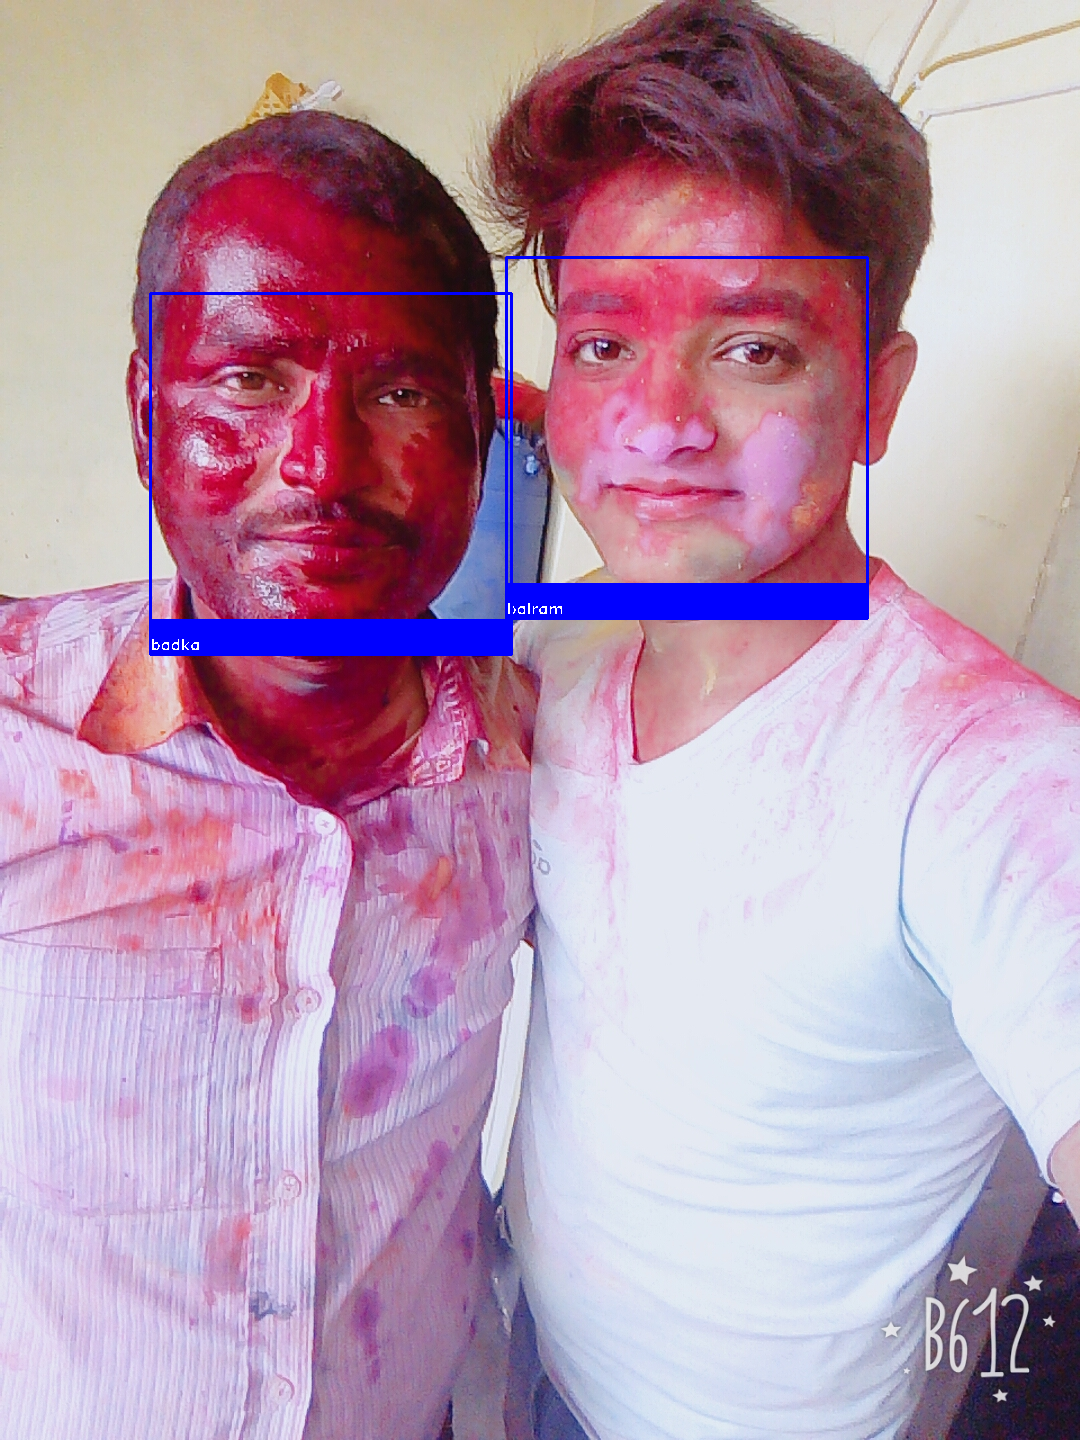

['balram', 'badka']

In [ ]:
classify_face("/content/drive/My Drive/Test image/test4.jpg")

In [ ]:
def learning(image):
  c_face=classify_face(image)
  if "Unknown" in c_face:
    que=input("There is unknown person would you like to add it to the system")
    if que=='Yes' or que=='yes':
      imageFileName=input("enter name of the image")
      shutil.move(imageFileName,'/content/drive/My Drive/face/')
      print(learning(image))
    else:
      print (c_face)
  else:
    print( c_face)
    

In [2]:
#learning("/content/drive/My Drive/Test image/test4.jpg")